Developing a Stock Price Predictor: Enhancing Investment Strategies with Machine Learning

In [52]:


# Explanation:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score

plt.figure(figsize=(12, 9))
from alpha_vantage.timeseries import TimeSeries
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from scipy.stats import zscore
# For reading stock data from yahoo
from pandas_datareader.data import DataReader




<Figure size 1200x900 with 0 Axes>

In [ ]:
# Explanation:
api_key = 'MY_API_KEY'
ts = TimeSeries(key=api_key, output_format='pandas')
# Fetch daily historical data for AAPL
data, meta_data = ts.get_daily(symbol='AAPL', outputsize='full')
print(data.head())
meta_data

In [72]:

# For time stamps
from datetime import datetime

# Set up End and Start times for data grab
tech_list = ['AAPL', 'NVDA', 'AVGO', 'AMZN']

end = '2020-01-01'
start = '2015-01-01'
#Downloading Stock Data for Each Company
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, NVDA, AVGO, AMZN]
company_name = ["APPLE", "NVIDIA", "Broadcom Inc", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,NVDA,NVDA,NVDA,NVDA,...,AVGO,AVGO,AVGO,AVGO,AVGO,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-17,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.532997,89.599998,88.869499,88.900497,72888000.0
2019-12-18,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.201500,89.910004,89.117996,89.750999,67028000.0
2019-12-19,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.613998,89.649498,88.703003,89.025002,53056000.0
2019-12-20,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.324997,90.148499,89.122498,89.981003,103016000.0
2019-12-23,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.650002,89.650002,89.225502,89.413002,42728000.0
2019-12-24,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.460503,89.778503,89.378998,89.690498,17626000.0
2019-12-26,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,93.438499,93.523003,89.974998,90.050499,120108000.0
2019-12-27,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,93.489998,95.070000,93.300499,94.146004,123732000.0


We are directly fetching stock data from a finance API and want to minimize preprocessing steps.


In [57]:

AAPL.info()
#There are 250 entries as approx 250 trading days

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-01-02 to 2019-12-31
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     1258 non-null   float64
 1   (High, AAPL)      1258 non-null   float64
 2   (Low, AAPL)       1258 non-null   float64
 3   (Open, AAPL)      1258 non-null   float64
 4   (Volume, AAPL)    1258 non-null   int64  
 5   (company_name, )  1258 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 68.8+ KB


In [56]:
AAPL.describe()
#We have only 255 records in one year because weekends are not included in the data.Describe exclude the NAN values 

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,36.221924,36.521679,35.893175,36.202790,1.435996e+08
std,11.159225,11.234806,11.053134,11.132024,7.153802e+07
min,20.697266,21.001967,20.497946,20.619363,4.544800e+07
25%,26.258171,26.538173,26.072109,26.289673,9.512290e+07
50%,35.362558,35.768020,35.001784,35.393604,1.263050e+08
75%,44.219518,44.558600,43.881617,44.187507,1.714582e+08
max,71.172127,71.249687,70.171135,70.558929,6.488252e+08


In [75]:
NVDA.describe()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,3.134525,3.180358,3.085615,3.135015,4.884904e+08
std,2.043182,2.073273,2.013083,2.045337,3.042773e+08
min,0.459382,0.468023,0.454582,0.463703,5.244800e+07
25%,0.866880,0.872084,0.853718,0.865105,3.022260e+08
50%,3.544621,3.594661,3.449945,3.515939,4.097360e+08
75%,4.812631,4.889771,4.728580,4.796762,5.825920e+08
max,7.168602,7.252834,7.074957,7.167612,3.692928e+09


In [55]:
AAPL.info()
#There are 250 entries as approx 250 trading days

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-01-02 to 2019-12-31
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     1258 non-null   float64
 1   (High, AAPL)      1258 non-null   float64
 2   (Low, AAPL)       1258 non-null   float64
 3   (Open, AAPL)      1258 non-null   float64
 4   (Volume, AAPL)    1258 non-null   int64  
 5   (company_name, )  1258 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 68.8+ KB


In [65]:
df

Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,NVDA,NVDA,NVDA,NVDA,...,AVGO,AVGO,AVGO,AVGO,AVGO,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,24.347174,24.817059,23.906238,24.805924,212818400.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,23.661278,24.195745,23.474215,24.115575,257142000.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,23.663500,23.924052,23.300507,23.725854,263188400.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,23.995316,24.095527,23.761486,23.872833,160423600.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,24.917267,24.975168,24.206871,24.324901,237458000.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.460503,89.778503,89.378998,89.690498,17626000.0
2019-12-26,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,93.438499,93.523003,89.974998,90.050499,120108000.0


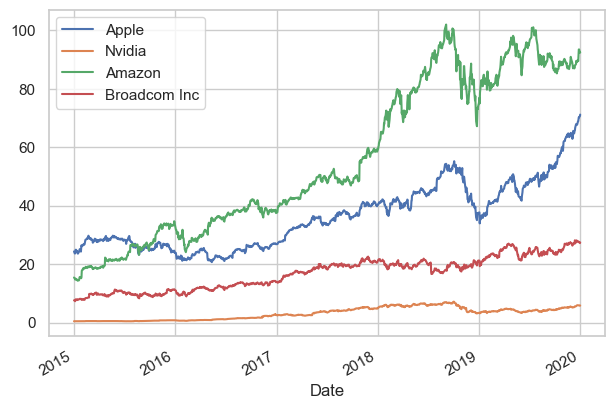

In [80]:


# You could also combine multiple companies in a plot
df['Close', 'AAPL'].plot(label='Apple')
df['Close', 'NVDA'].plot(label='Nvidia')
df['Close', 'AMZN'].plot(label='Amazon')
df['Close', 'AVGO'].plot(label='Broadcom Inc')


plt.legend()
plt.show()

In [77]:
# Inspect the data to see if we have any records for the companies
print(df.head())  # Check the first few rows of the dataframe
print(df.columns)  # Check if the 'Volume' column exists and is named correctly

# Check the data for each company to make sure it's not empty
for ticker in company_tickers:
    company_data = filter_data_by_company(df, ticker)
    print(f"\nData for {ticker}:")
    print(company_data.head())  # Display the first few rows for each company
 

Price           Close       High        Low       Open       Volume  \
Ticker           AAPL       AAPL       AAPL       AAPL         AAPL   
Date                                                                  
2015-01-02  24.347174  24.817059  23.906238  24.805924  212818400.0   
2015-01-05  23.661278  24.195745  23.474215  24.115575  257142000.0   
2015-01-06  23.663500  23.924052  23.300507  23.725854  263188400.0   
2015-01-07  23.995316  24.095527  23.761486  23.872833  160423600.0   
2015-01-08  24.917267  24.975168  24.206871  24.324901  237458000.0   

Price      company_name Close High  Low Open  ... Close High  Low Open Volume  \
Ticker                   NVDA NVDA NVDA NVDA  ...  AVGO AVGO AVGO AVGO   AVGO   
Date                                          ...                               
2015-01-02        APPLE   NaN  NaN  NaN  NaN  ...   NaN  NaN  NaN  NaN    NaN   
2015-01-05        APPLE   NaN  NaN  NaN  NaN  ...   NaN  NaN  NaN  NaN    NaN   
2015-01-06        APPLE   

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


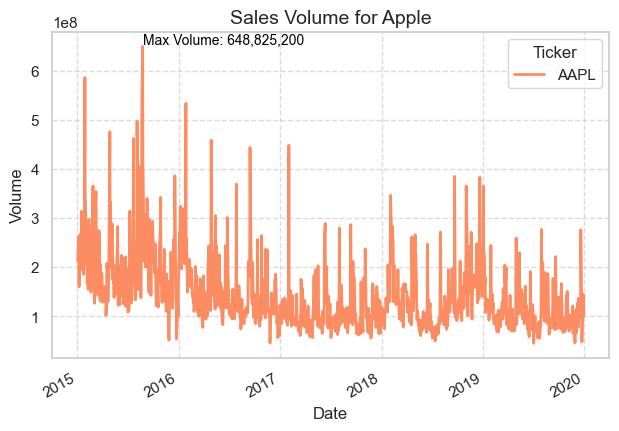

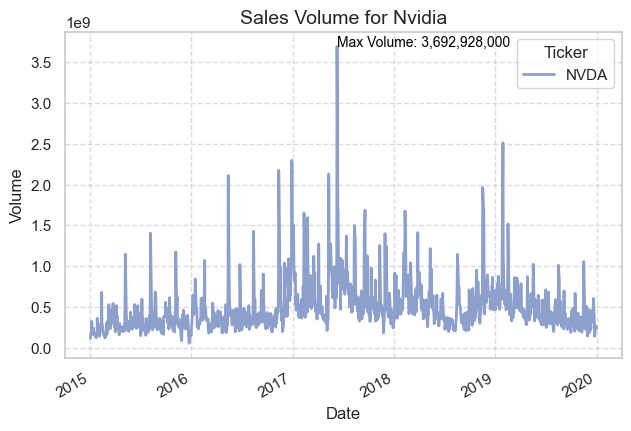

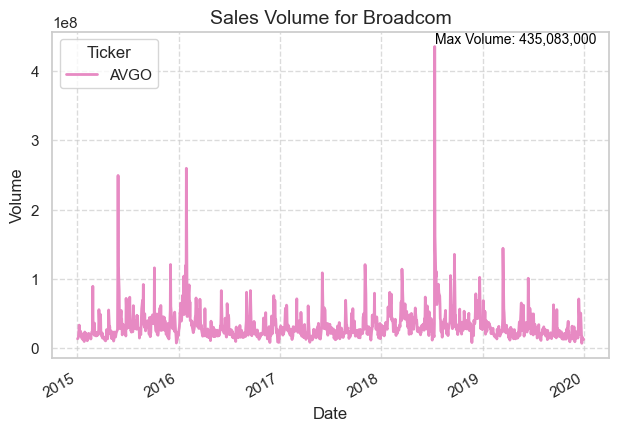

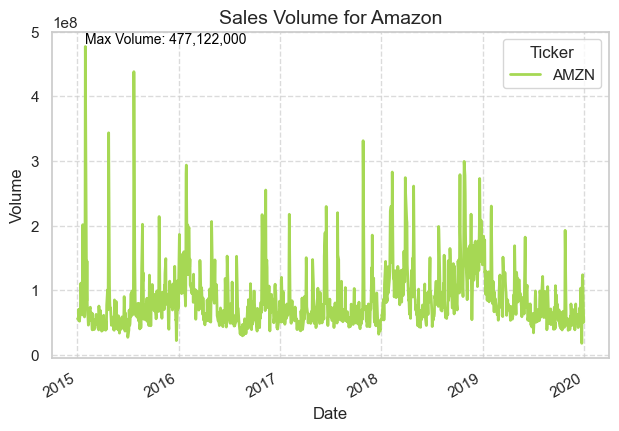

In [11]:
#Get the volume of the stocks 

sns.set(style="whitegrid")


# Plotting the daily trading volume for each stock company
def plot_stock_volume(company_data, company_names):
    """Plot the daily volume of stocks for the given companies."""
    #plt.figure(figsize=(15, 12))  # Set the figure size for the plots
    #plt.subplots_adjust(top=1.1, bottom=0.05, left=0.1, right=1.3)  # Adjust spacing for better layout

    # Loop through each company's data and plot their volume
    for i, (company, company_name) in enumerate(zip(company_data, company_names), 1):
        #plt.subplot(2, 2, i)  # 2x2 grid for 4 companies (adjust as needed)
        
        # Plot the volume of stock traded each day with a specific color
        company['Volume'].plot(color=sns.color_palette("Set2")[i], linewidth=2)
        
        # Enable gridlines for better readability
        plt.grid(True, linestyle='--', alpha=0.7)
        
        # Set labels and title for each subplot
        plt.ylabel('Volume')
        plt.xlabel('Date')
        plt.title(f"Sales Volume for {company_name}", fontsize=14)
        
        # Annotate the maximum volume point
        max_volume_date = company['Volume'].idxmax()
        max_volume_value = company['Volume'].max()
        
        # Convert max volume value to scalar (int or float)
        max_volume_value = max_volume_value.item()  # Ensures scalar value
        
        # Annotate with the max volume and draw an arrow pointing to it
        plt.annotate(f'Max Volume: {max_volume_value:,.0f}', 
                     xy=(max_volume_date, max_volume_value),  # Point to max volume
                     xytext=(max_volume_date, max_volume_value + 5000000
                            ),  # Position of the annotation
                     arrowprops=dict(facecolor='black', arrowstyle='->'),  # Arrow style
                     fontsize=10, color='black')

    
    # Display the plots
    plt.show()

# Main Execution
if __name__ == "__main__":
    
    # Fetch stock data for each company
    company_data = fetch_stock_data(company_tickers, start, end)
    
    # Plot stock volume data with annotations
    plot_stock_volume(company_data, company_names)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for AAPL...
Fetching data for NVDA...
Fetching data for AVGO...
Fetching data for AMZN...


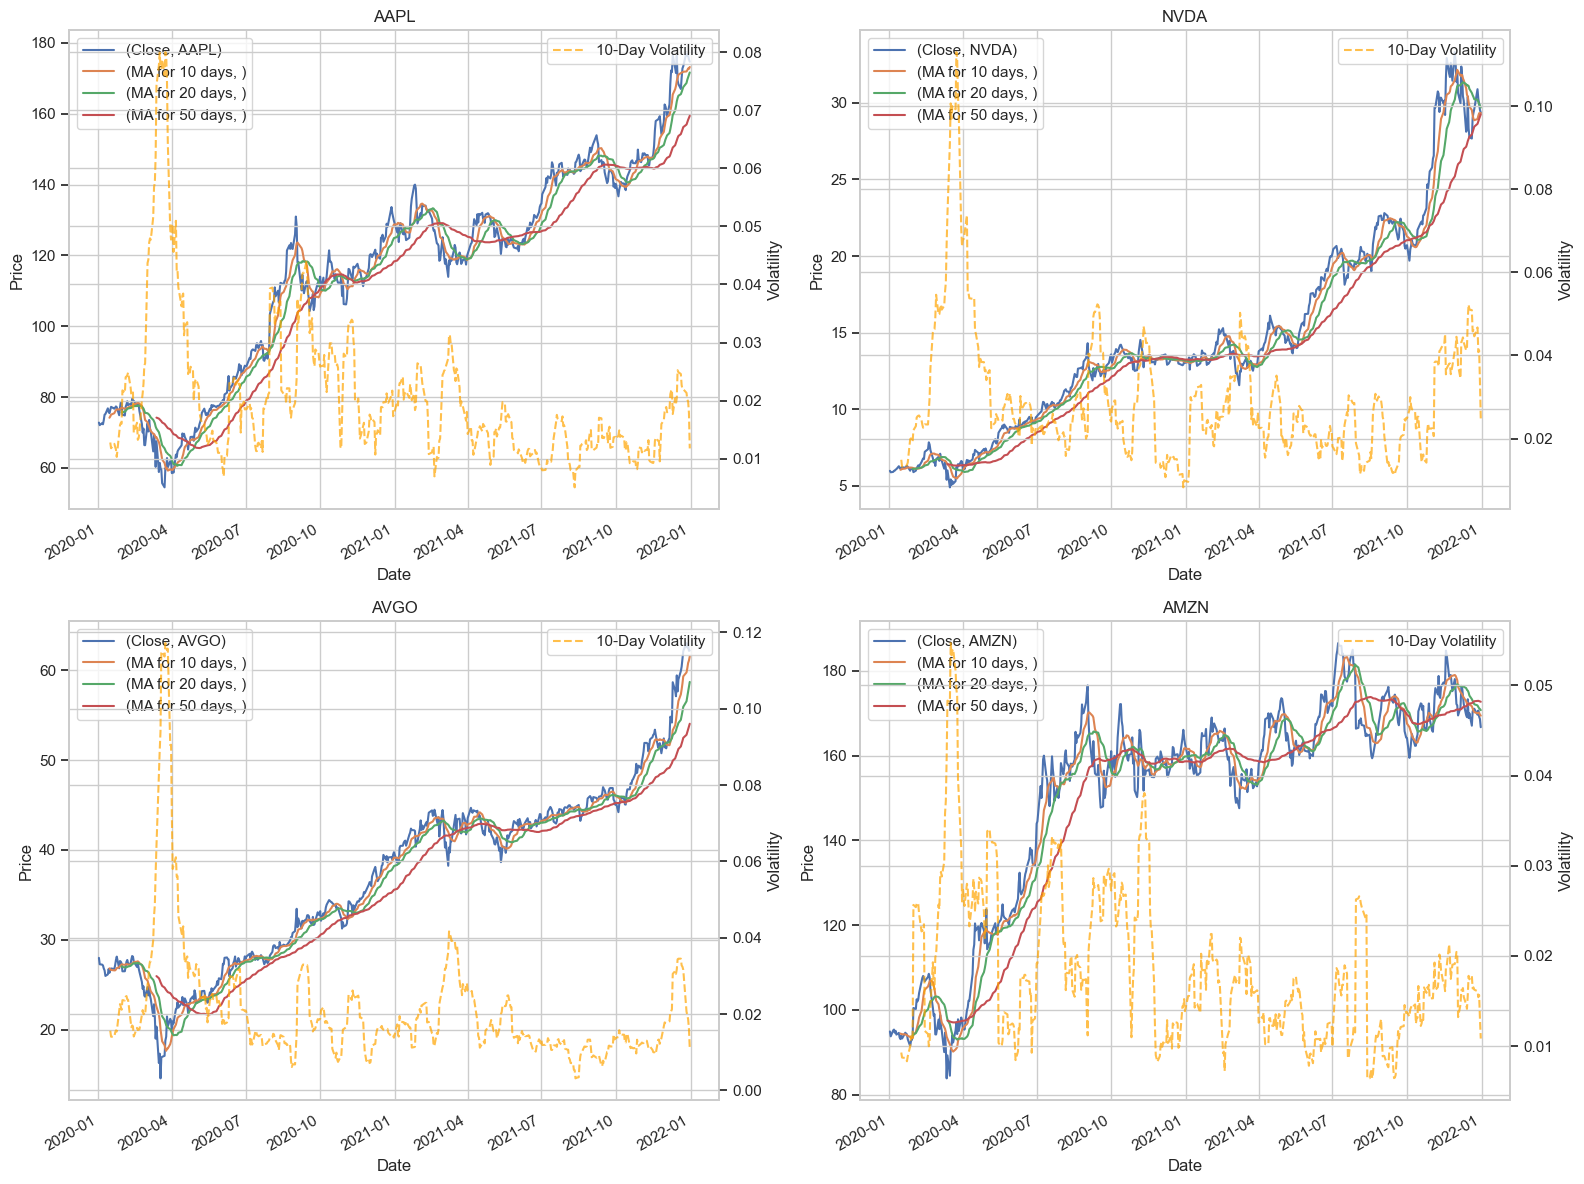

In [89]:
def analyze_stocks(company_list, start_date, end_date, ma_days):
    """
    Fetch stock data, calculate moving averages and volatility, and plot results.

    Parameters:
        company_list (list): List of stock tickers.
        start_date (str): Start date for data fetching (YYYY-MM-DD).
        end_date (str): End date for data fetching (YYYY-MM-DD).
        ma_days (list): List of moving average days.
    
    Returns:
        dict: A dictionary of DataFrames for each company's data with added columns.
    """
    companies = {}
    
    # Fetch data for each company
    for company in company_list:
        print(f"Fetching data for {company}...")
        companies[company] = yf.download(company, start=start_date, end=end_date)
    
    # Calculate moving averages and volatility
    for company_name, company_data in companies.items():
        for ma in ma_days:
            company_data[f"MA for {ma} days"] = company_data['Close'].rolling(ma).mean()
        company_data['Daily_Return'] = company_data['Close'].pct_change()
        company_data['Volatility (10-day)'] = company_data['Daily_Return'].rolling(10).std()
    
    # Plot the data
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
    axes = axes.flatten()

    for idx, (company_name, company_data) in enumerate(companies.items()):
        ax = axes[idx]
        company_data[['Close'] + [f"MA for {ma} days" for ma in ma_days]].plot(ax=ax)
        
        # Add volatility to a secondary y-axis
        ax2 = ax.twinx()
        company_data['Volatility (10-day)'].plot(ax=ax2, color='orange', linestyle='--', alpha=0.7)
        
        # Titles and Legends
        ax.set_title(company_name)
        ax.set_ylabel('Price')
        ax2.set_ylabel('Volatility')
        ax.legend(loc='upper left')
        ax2.legend(['10-Day Volatility'], loc='upper right')
    
    fig.tight_layout()
    plt.show()

    return companies

# Example usage
start_date = '2020-01-01'
end_date = '2022-01-01'
ma_days = [10, 20, 50]

company_data_dict = analyze_stocks(company_list, start_date, end_date, ma_days)


#Key Updates:
#Volatility Calculation:
#Calculated as the rolling standard deviation of daily returns (Daily_Return) over a 10-day window

#Visualization Enhancements:
#Added a secondary y-axis to each subplot to visualize volatility alongside moving averages and closing prices.
#Used distinct styles (e.g., dashed orange line) for volatility to differentiate it from price data.
#Subplot Structure:


#Output:
#Subplots will display:
#The stock's Closing Price and Moving Averages (10, 20, and 50 days).
#The 10-Day Volatility as a dashed orange line on a secondary y-axis.






Key Updates:
Volatility Calculation:
Calculated as the rolling standard deviation of daily returns (Daily_Return) over a 10-day window.




In [107]:
def prepare_stock_data(symbol, start_date, end_date):
    """
    Prepares stock data for training a predictive model.
    - Handles MultiIndex columns (e.g., 'Close', 'High', 'Low', etc. with ticker names as second-level index).
    - Computes technical features (e.g., moving averages, daily returns).
    - Scales the features and prepares the training dataset.

    Parameters:
        symbol (str): Stock ticker symbol (e.g., 'AAPL').
        start_date (str): Start date for fetching data (YYYY-MM-DD).
        end_date (str): End date for fetching data (YYYY-MM-DD).

    Returns:
        x_train (np.ndarray): Training feature set.
        y_train (np.ndarray): Training target values.
        df (pd.DataFrame): Processed DataFrame with features.
        scaler (MinMaxScaler): Scaler fitted to the data.
    """
    df = yf.download(symbol, start=start_date, end=end_date)

    df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]
    close_col = f'Close_{symbol}'
    if close_col not in df.columns:
        raise KeyError(f"Error: '{close_col}' column is missing from the data.")

    df = df.dropna(subset=[close_col])

    df[f'SMA_10_{symbol}'] = df[close_col].rolling(window=10).mean()  # 10-day simple moving average
    df[f'SMA_50_{symbol}'] = df[close_col].rolling(window=50).mean()  # 50-day simple moving average
    df[f'Daily_Return_{symbol}'] = df[close_col].pct_change()         # Daily percentage returns
    df.dropna(inplace=True)

    features = [f'SMA_10_{symbol}', f'SMA_50_{symbol}', f'Daily_Return_{symbol}', close_col]
    X = df[features]
    y = df[close_col].shift(-1)  # Target is the next day's closing price

    df = df.iloc[:-1]
    X = X.iloc[:-1]
    y = y.iloc[:-1]

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(X)

    X_scaled = scaled_data[:, :-1]  # Features
    y_scaled = scaled_data[:, -1]   # Target: Close

    x_train = []
    y_train = []

    for i in range(60, len(X_scaled)):
        x_train.append(X_scaled[i-60:i])  # Last 60 days of features
        y_train.append(y_scaled[i])      # Corresponding target value

    # Convert to numpy arrays
    x_train = np.array(x_train)
    y_train = np.array(y_train)

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))

    # Print status
    print(f"Training data shape (x_train): {x_train.shape}")
    print(f"Training labels shape (y_train): {y_train.shape}")

    return x_train, y_train, X, y, df, scaler


symbol = 'AAPL'  # Example: Apple stock ticker
start_date = '2015-01-01'
end_date = '2020-01-01'

# Prepare the data
x_train, y_train,X, y, df, scaler = prepare_stock_data(symbol, start, end)
df
scaler

[*********************100%***********************]  1 of 1 completed

Training data shape (x_train): (1148, 60, 3)
Training labels shape (y_train): (1148,)


MinMaxScaler()

Train set size: (966, 4), Test set size: (242, 4)
Mean Squared Error: 0.40
Mean Absolute Error: 0.44


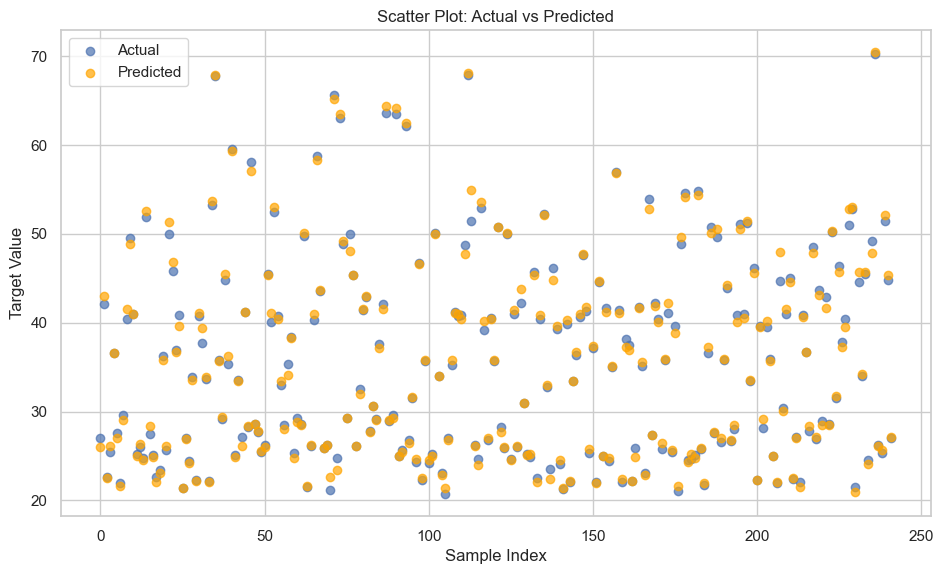

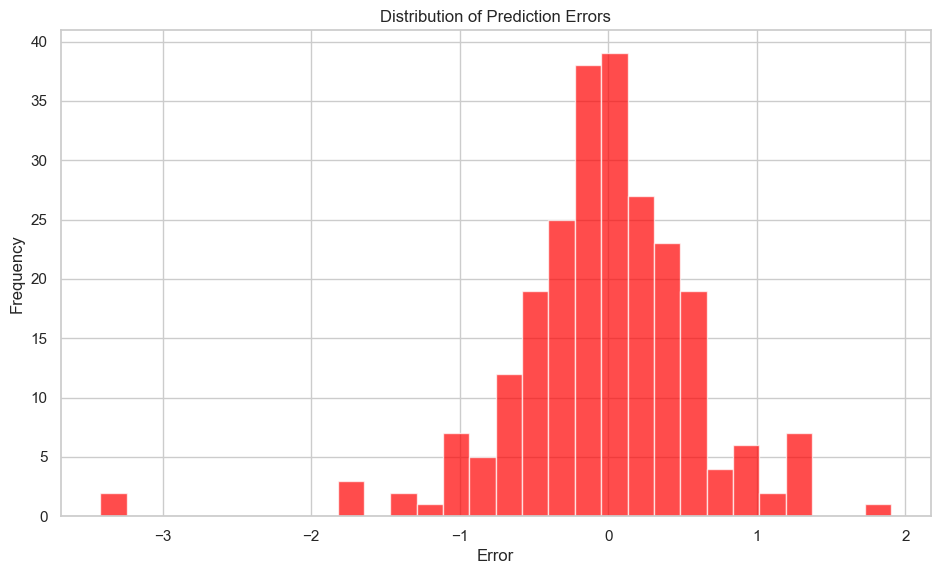

In [156]:
def random_forest_analysis(X, y):
    """
    Train a Random Forest Regressor and visualize performance.

    Parameters:
        X (pd.DataFrame or np.ndarray): Features.
        y (pd.Series or np.ndarray): Target variable.

    Displays:
        - Predictions vs Actual (Line Plot)
        - Predictions vs Actual (Scatter Plot)
        - Combined Performance Plot with MSE and MAE
        - Histogram of Prediction Errors
    """
    # Step 1: Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Train set size: {X_train.shape}, Test set size: {X_test.shape}")

    # Step 2: Initialize and train the Random Forest model
    model = RandomForestRegressor(n_estimators=200, random_state=42)
    model.fit(X_train, y_train)

    # Step 3: Predictions
    y_pred = model.predict(X_test)

    # Step 4: Performance Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")

    # Step 5: Visualizations

    # 5.2: Predictions vs Actual (Scatter Plot)
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_test)), y_test.values, label='Actual', alpha=0.7)
    plt.scatter(range(len(y_pred)), y_pred, label='Predicted', alpha=0.7, color='orange')
    plt.legend()
    plt.title("Scatter Plot: Actual vs Predicted")
    plt.xlabel("Sample Index")
    plt.ylabel("Target Value")
    plt.show()


    # 5.4: Distribution of Prediction Errors
    errors = (y_test.values.flatten() - y_pred.flatten())  # Ensure 1D
    plt.figure(figsize=(10, 6))
    plt.hist(errors, bins=30, alpha=0.7, color='red')
    plt.title("Distribution of Prediction Errors")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.show()

random_forest_analysis(X, y)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}
Mean Squared Error (Best Model): 0.40
Mean Absolute Error (Best Model): 0.44


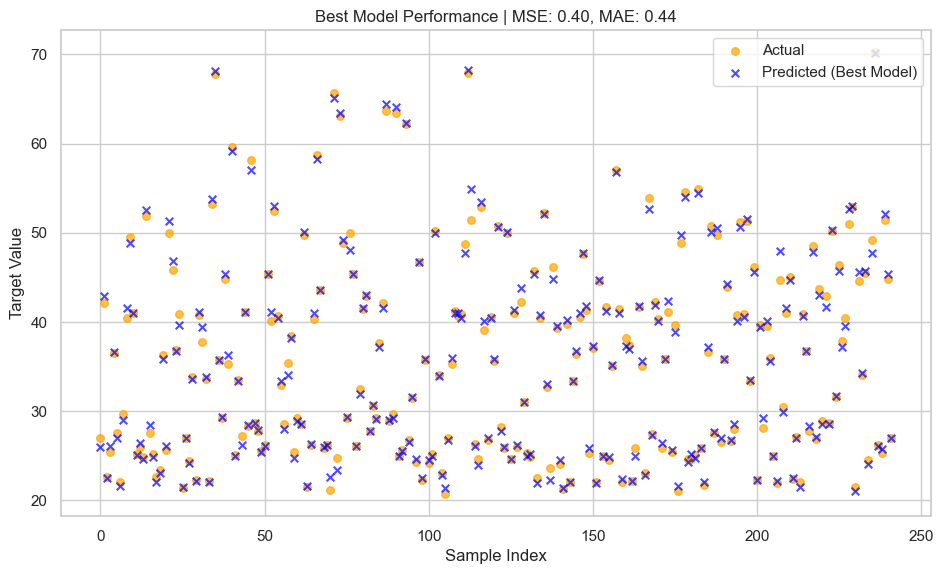

In [149]:
def determine_best_model(X, y):
    """
    Determines the best Random Forest model using GridSearchCV for hyperparameter tuning,
    evaluates the model, and visualizes the results.

    Parameters:
        X (pd.DataFrame or np.ndarray): Features.
        y (pd.Series or np.ndarray): Target variable.

    Displays:
        - Best hyperparameters
        - Performance metrics (MSE, MAE)
        - Predictions vs Actual visualization
    """
    # Step 1: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Step 2: Define hyperparameters for tuning
    param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
    
    # Step 3: Initialize GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=RandomForestRegressor(random_state=42),
        param_grid=param_grid,
        cv=3,
        scoring='neg_mean_squared_error',
        verbose=1,
    )
    
    # Step 4: Fit GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Step 5: Retrieve the best model
    best_model = grid_search.best_estimator_
    print("Best hyperparameters:", grid_search.best_params_)
    
    # Step 6: Evaluate the best model
    y_pred_best = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_best)
    mae = mean_absolute_error(y_test, y_pred_best)
    print(f"Mean Squared Error (Best Model): {mse:.2f}")
    print(f"Mean Absolute Error (Best Model): {mae:.2f}")
    
    # Step 7: Visualize predictions vs actual
    # Step 7: Visualize predictions vs actual using scatter plot
    plt.figure(figsize=(10, 6))
    
    # Scatter plot for Actual values
    plt.scatter(range(len(y_test)), y_test.values, label='Actual', alpha=0.7, color='orange', s=30, marker='o')
    
    # Scatter plot for Predicted values
    plt.scatter(range(len(y_pred_best)), y_pred_best, label='Predicted (Best Model)', alpha=0.7, color='blue', s=30, marker='x')
    
    plt.legend()
    plt.title(f"Best Model Performance | MSE: {mse:.2f}, MAE: {mae:.2f}")
    plt.xlabel("Sample Index")
    plt.ylabel("Target Value")
    plt.show()

    return best_model

best_model = determine_best_model(X, y)

[*********************100%***********************]  1 of 1 completed

Fetching data for AAPL from 2015-01-01 to 2020-01-01...



/usr/local/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Linear Regression Model:
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.18
Mean Absolute Error (MAE): 0.13
R-squared (R²): 1.00

Random Forest Model:
Mean Squared Error (MSE): 0.07
Root Mean Squared Error (RMSE): 0.26
Mean Absolute Error (MAE): 0.18
R-squared (R²): 1.00

Linear Regression performs better than Random Forest.


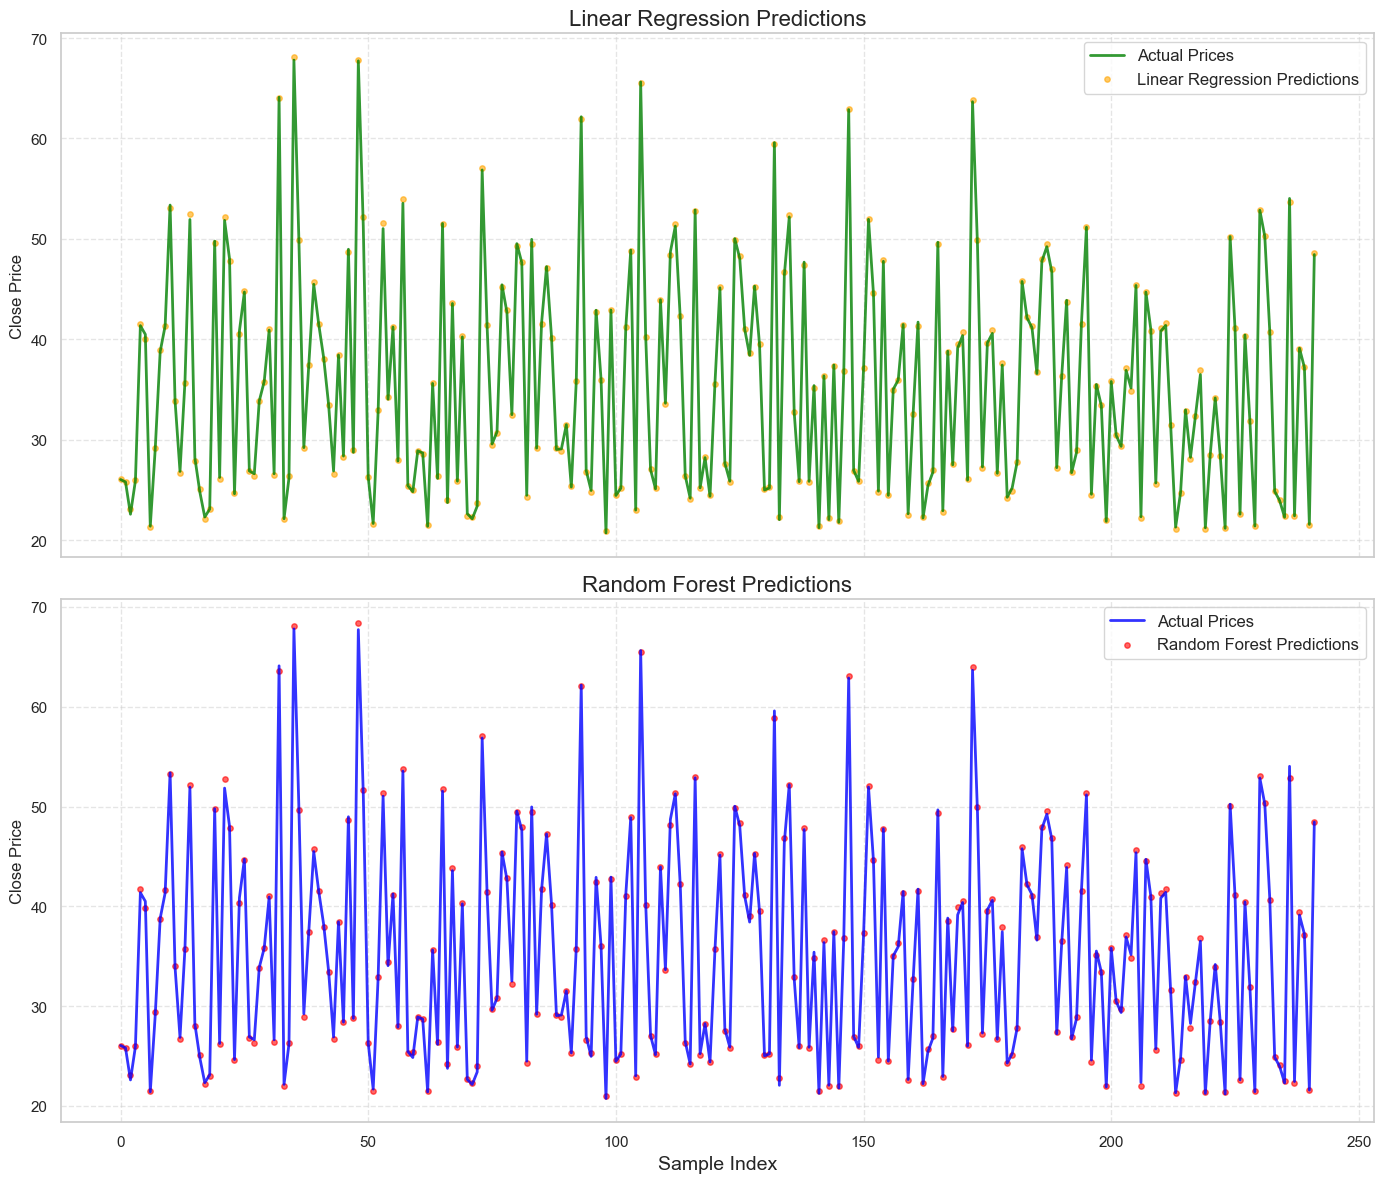

In [160]:
def compare_models(ticker, start_date, end_date):
    """
    Compare Linear Regression and Random Forest models on stock data.

    Parameters:
        ticker (str): Stock ticker symbol.
        start_date (str): Start date for data in 'YYYY-MM-DD' format.
        end_date (str): End date for data in 'YYYY-MM-DD' format.

    Prints:
        - Evaluation metrics (MSE, RMSE, MAE, R²) for both models.
        - Model comparison result.
    """
    # Step 1: Fetch historical stock data
    print(f"Fetching data for {ticker} from {start_date} to {end_date}...")
    data = yf.download(ticker, start=start_date, end=end_date, actions=True)
    
    # Step 2: Feature engineering
    data['Return'] = data['Close'].pct_change()  # Daily returns
    data['MA_20'] = data['Close'].rolling(20).mean()  # 20-day moving average
    data['MA_50'] = data['Close'].rolling(50).mean()  # 50-day moving average
    data = data.dropna()  # Drop NaN values after rolling calculations

    # Select features and target
    features = ['Open', 'High', 'Low', 'Volume', 'MA_20', 'MA_50']
    X = data[features]
    y = data['Close']

    # Step 3: Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 4: Train Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Step 5: Train Random Forest model
    rf_model = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=5, random_state=42)
    rf_model.fit(X_train, y_train)

    # Step 6: Make predictions
    y_pred_lr = lr_model.predict(X_test)
    y_pred_rf = rf_model.predict(X_test)

    # Step 7: Evaluate model performance
    # Metrics for Linear Regression
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    rmse_lr = np.sqrt(mse_lr)
    mae_lr = mean_absolute_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)

    # Metrics for Random Forest
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    rmse_rf = np.sqrt(mse_rf)
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)

    # Step 8: Print evaluation metrics
    print("\nLinear Regression Model:")
    print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
    print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
    print(f"R-squared (R²): {r2_lr:.2f}")

    print("\nRandom Forest Model:")
    print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
    print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
    print(f"R-squared (R²): {r2_rf:.2f}")

    # Step 9: Determine the better model
    if r2_lr > r2_rf:
        print("\nLinear Regression performs better than Random Forest.")
    else:
        print("\nRandom Forest performs better than Linear Regression.")

    # Step 10: Visualization
    fig, axs = plt.subplots(2, 1, figsize=(14, 12), sharex=True)
    
    # Subplot 1: Linear Regression Predictions
    axs[0].plot(y_test.values, label='Actual Prices', color='green', linewidth=2, alpha=0.8)
    axs[0].scatter(range(len(y_pred_lr)), y_pred_lr, label='Linear Regression Predictions', color='orange', alpha=0.6, s=15)
    axs[0].set_title('Linear Regression Predictions', fontsize=16)
    axs[0].set_ylabel('Close Price', fontsize=12)
    axs[0].grid(True, linestyle='--', alpha=0.5)
    axs[0].legend(fontsize=12)
    
    # Subplot 2: Random Forest Predictions
    axs[1].plot(y_test.values, label='Actual Prices', color='blue', linewidth=2, alpha=0.8)
    axs[1].scatter(range(len(y_pred_rf)), y_pred_rf, label='Random Forest Predictions', color='red', alpha=0.6, s=15)
    axs[1].set_title('Random Forest Predictions', fontsize=16)
    axs[1].set_ylabel('Close Price', fontsize=12)
    axs[1].grid(True, linestyle='--', alpha=0.5)
    axs[1].legend(fontsize=12)
    
    # Shared X-axis label
    plt.xlabel("Sample Index", fontsize=14)
    
    # Adjust layout for clarity
    plt.tight_layout()
    
    # Display the plot
    plt.show()
compare_models(ticker='AAPL', start_date=start, end_date=end)
#compare_models(ticker='AAPL', start_date='2015-01-01', end_date='2018-01)

In [154]:
def compare_models(ticker, start_date, end_date):
    """
    Compare Linear Regression and Random Forest models on stock data.

    Parameters:
        ticker (str): Stock ticker symbol.
        start_date (str): Start date for data in 'YYYY-MM-DD' format.
        end_date (str): End date for data in 'YYYY-MM-DD' format.

    Prints:
        - Evaluation metrics (MSE, RMSE, MAE, R²) for both models.
        - Model comparison result.
    """
    # Step 1: Fetch historical stock data
    print(f"Fetching data for {ticker} from {start_date} to {end_date}...")
    data = yf.download(ticker, start=start_date, end=end_date, actions=True)
    
    # Step 2: Feature engineering
    data['Return'] = data['Close'].pct_change()  # Daily returns
    data['MA_20'] = data['Close'].rolling(20).mean()  # 20-day moving average
    data['MA_50'] = data['Close'].rolling(50).mean()  # 50-day moving average
    data = data.dropna()  # Drop NaN values after rolling calculations

    # Select features and target
    features = ['Open', 'High', 'Low', 'Volume', 'MA_20', 'MA_50']
    X = data[features]
    y = data['Close']

    # Step 3: Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 4: Train Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Step 5: Train Random Forest model
    rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
    rf_model.fit(X_train, y_train)

    # Step 6: Make predictions
    y_pred_lr = lr_model.predict(X_test)
    y_pred_rf = rf_model.predict(X_test)

    # Step 7: Evaluate model performance
    # Metrics for Linear Regression
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    rmse_lr = np.sqrt(mse_lr)
    mae_lr = mean_absolute_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)

    # Metrics for Random Forest
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    rmse_rf = np.sqrt(mse_rf)
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)

    # Step 8: Print evaluation metrics
    print("\nLinear Regression Model:")
    print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
    print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
    print(f"R-squared (R²): {r2_lr:.2f}")

    print("\nRandom Forest Model:")
    print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
    print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
    print(f"R-squared (R²): {r2_rf:.2f}")

    # Step 9: Determine the better model
    if r2_lr > r2_rf:
        print("\nLinear Regression performs better than Random Forest.")
    else:
        print("\nRandom Forest performs better than Linear Regression.")

    # Step 10: Visualization

    plt.figure(figsize=(12, 8))
    plt.plot(y_test.values, label='Actual Prices', color='green', linewidth=2, alpha=0.7)
    plt.scatter(range(len(y_pred_lr)), y_pred_lr, label='Linear Regression Predictions', color='red', alpha=0.7, s=10)
    plt.scatter(range(len(y_pred_rf)), y_pred_rf, label='Random Forest Predictions', color='blue', alpha=0.7, s=10)
    plt.title(f"Model Comparison for {ticker} with Scatter Points")
    plt.xlabel("Sample Index")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid()
    plt.show()

[*********************100%***********************]  1 of 1 completed

Fetching data for AAPL from 2015-01-01 to 2020-01-01...



/usr/local/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Linear Regression Model:
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.18
Mean Absolute Error (MAE): 0.13
R-squared (R²): 1.00

Random Forest Model:
Mean Squared Error (MSE): 0.07
Root Mean Squared Error (RMSE): 0.26
Mean Absolute Error (MAE): 0.18
R-squared (R²): 1.00

Linear Regression performs better than Random Forest.


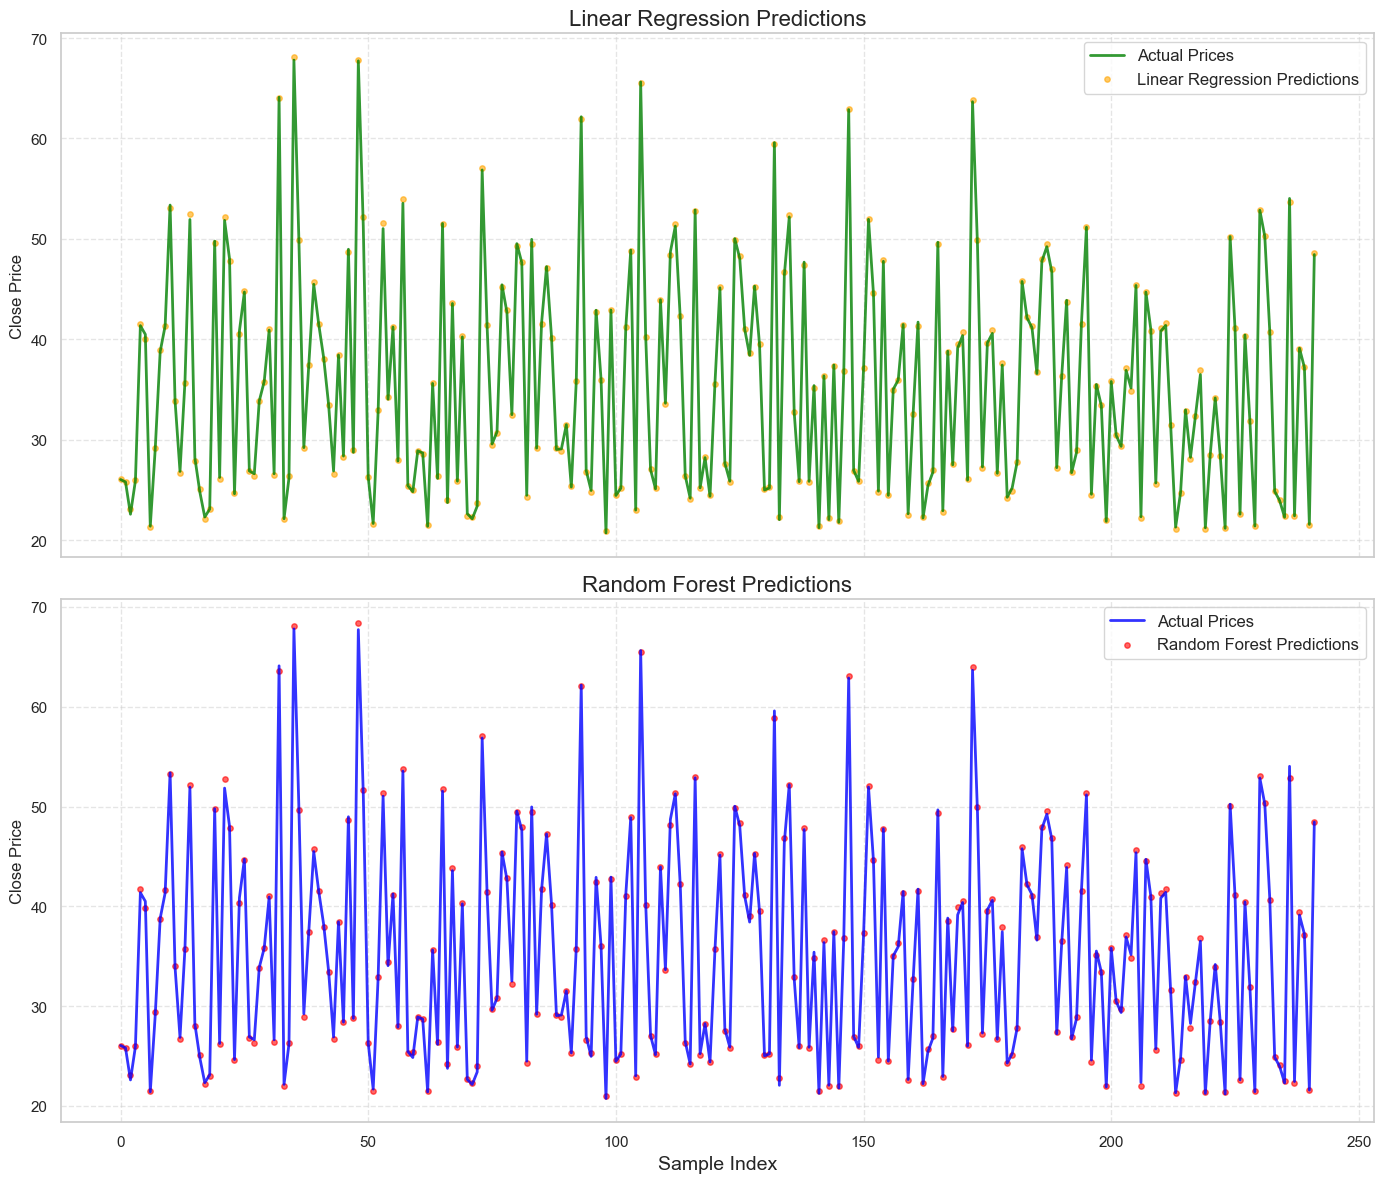

In [164]:
compare_models(ticker='AAPL', start_date=start, end_date=end)

[*********************100%***********************]  1 of 1 completed

Fetching data for AVGO from 2015-01-01 to 2020-01-01...



/usr/local/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Linear Regression Model:
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.13
Mean Absolute Error (MAE): 0.10
R-squared (R²): 1.00

Random Forest Model:
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17
Mean Absolute Error (MAE): 0.12
R-squared (R²): 1.00

Linear Regression performs better than Random Forest.


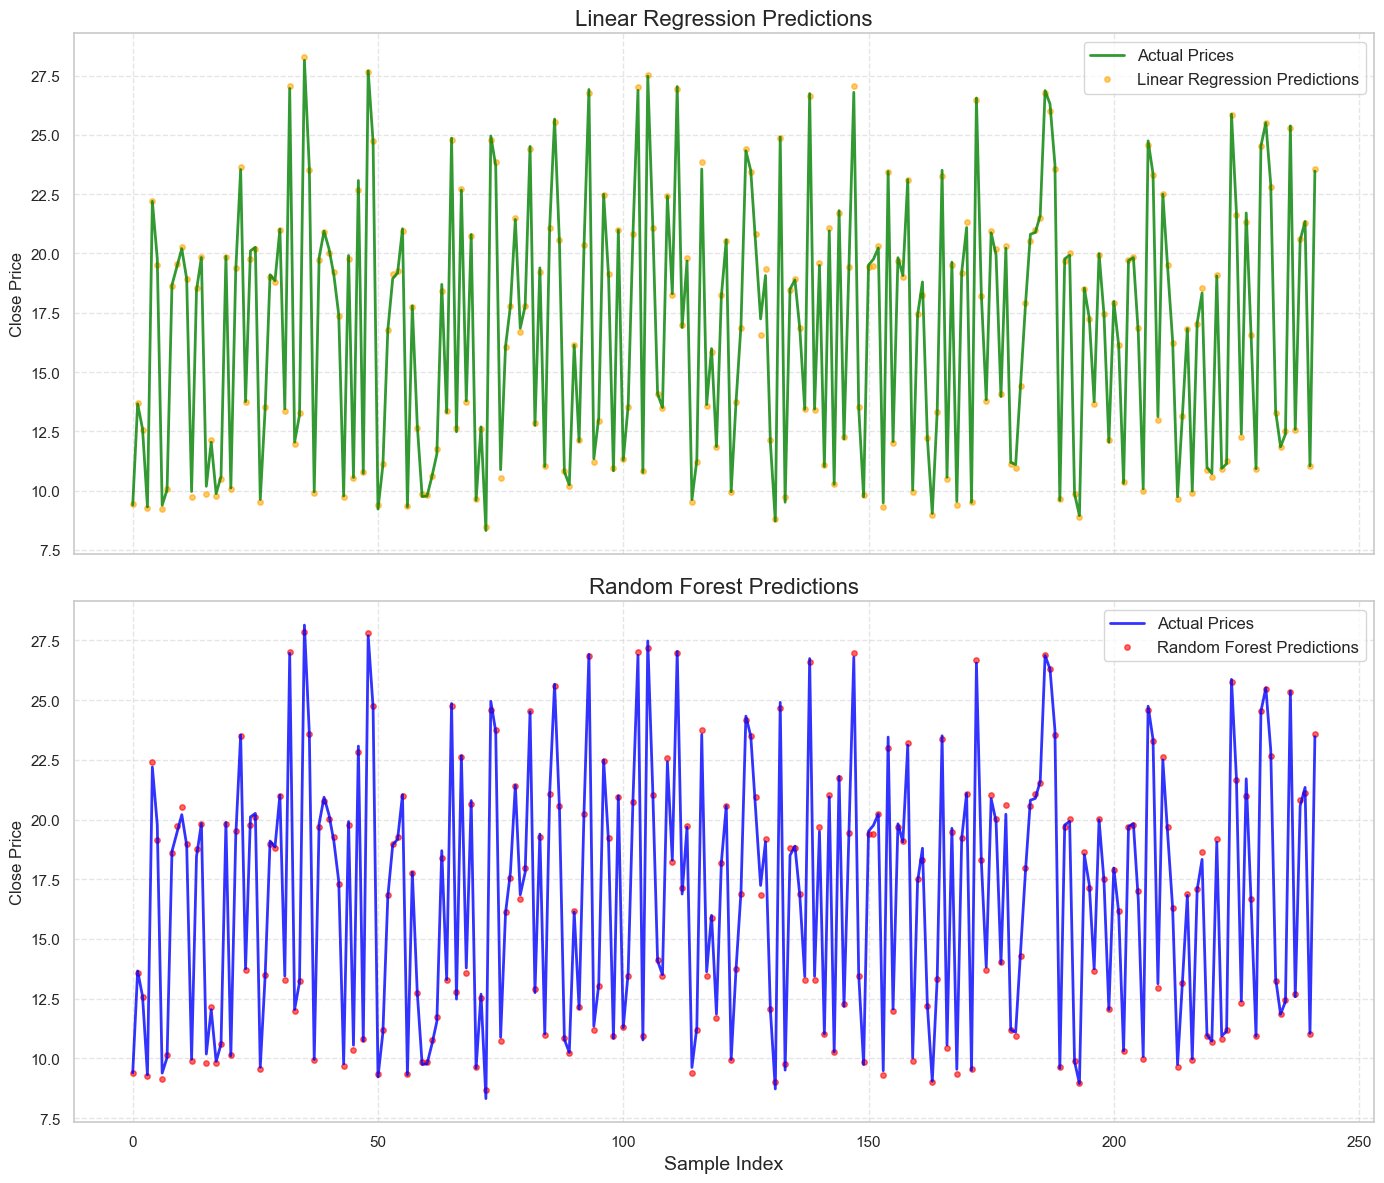

In [166]:
compare_models(ticker='AVGO', start_date=start, end_date=end)

[*********************100%***********************]  1 of 1 completed

Fetching data for AMZN from 2015-01-01 to 2020-01-01...



/usr/local/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Linear Regression Model:
Mean Squared Error (MSE): 0.11
Root Mean Squared Error (RMSE): 0.34
Mean Absolute Error (MAE): 0.22
R-squared (R²): 1.00

Random Forest Model:
Mean Squared Error (MSE): 0.29
Root Mean Squared Error (RMSE): 0.54
Mean Absolute Error (MAE): 0.34
R-squared (R²): 1.00

Linear Regression performs better than Random Forest.


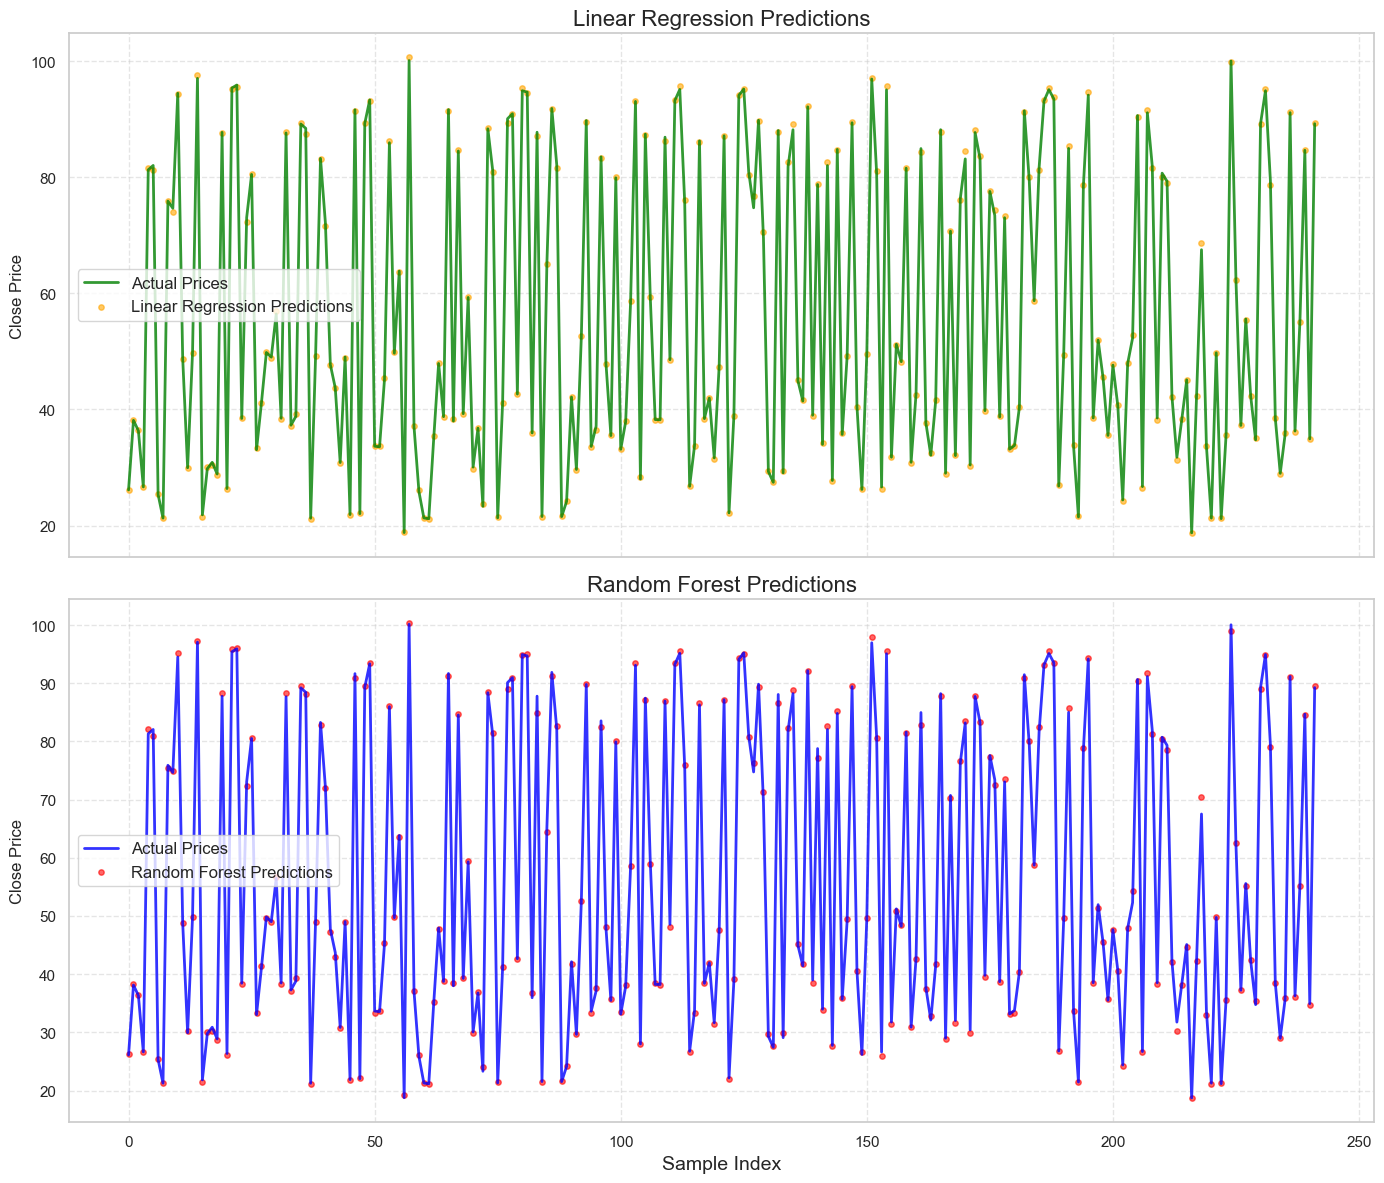

In [165]:
compare_models(ticker='AMZN', start_date=start, end_date=end)

[*********************100%***********************]  1 of 1 completed

Fetching data for AAPL from 2015-01-01 to 2020-01-01...



/usr/local/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.617e+01, tolerance: 6.858e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.123e+01, tolerance: 5.505e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the

Best Alpha for Ridge Regression: 0.01
Best Alpha for Lasso Regression: 0.01

Ridge Regression - MAE: 0.6286, MSE: 0.7515, R²: 0.9896
Lasso Regression - MAE: 0.6514, MSE: 0.7635, R²: 0.9895


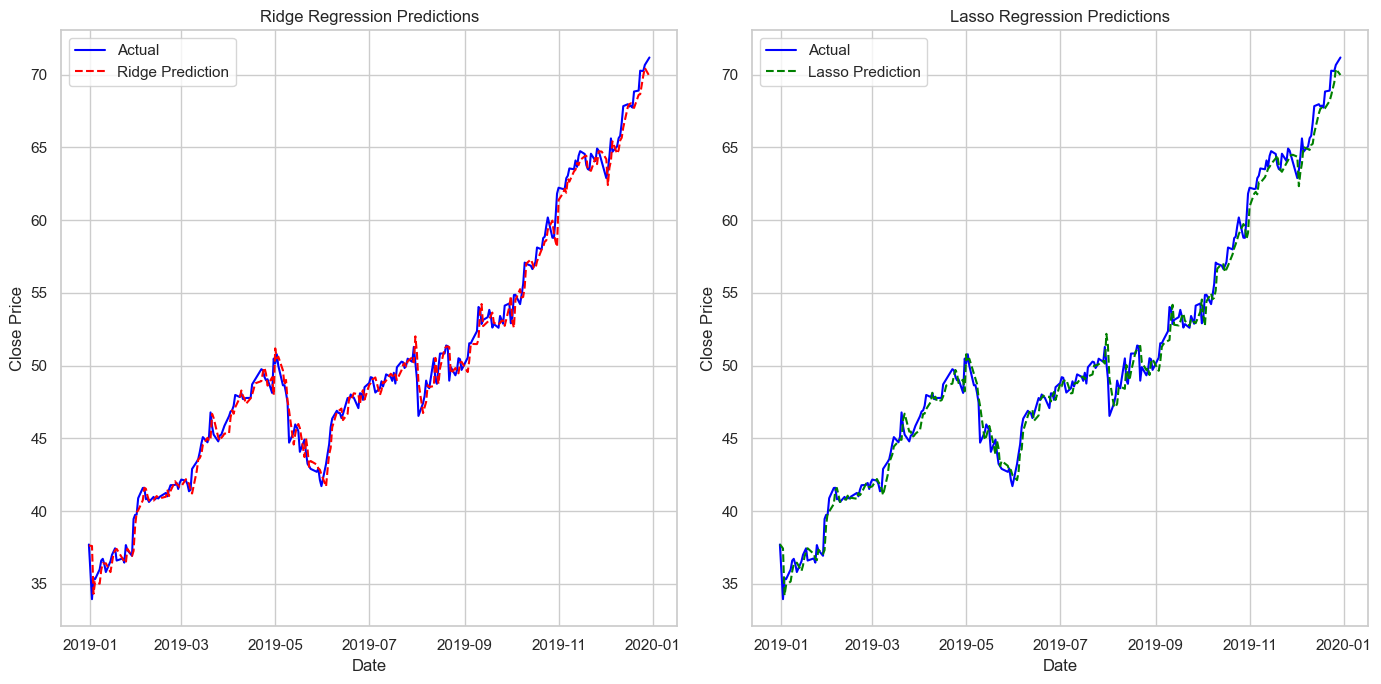

In [142]:
def compare_ridge_lasso(ticker, start_date, end_date):
    """
    Compare Ridge and Lasso regression models on stock data.

    Parameters:
        ticker (str): Stock ticker symbol.
        start_date (str): Start date in 'YYYY-MM-DD' format.
        end_date (str): End date in 'YYYY-MM-DD' format.

    Prints:
        - Best hyperparameters for both models.
        - Evaluation metrics (MAE, MSE, R²) for both models.
        - Plots predictions for Ridge and Lasso regressions.
    """
    # Fetch historical stock data
    print(f"Fetching data for {ticker} from {start_date} to {end_date}...")
    df = yf.download(ticker, start=start_date, end=end_date)
    
    # Create target variable (next day's price)
    df['Target'] = df['Close'].shift(-1)
    df = df.dropna()  # Drop the last row with NaN target

    # Define features and target
    X = df[['Open', 'High', 'Low', 'Volume']]
    y = df['Target']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define models and hyperparameter grid
    param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
    ridge = Ridge()
    lasso = Lasso()

    # Perform GridSearchCV for Ridge
    ridge_grid = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
    ridge_grid.fit(X_train_scaled, y_train)
    ridge_best = Ridge(alpha=ridge_grid.best_params_['alpha'])
    ridge_best.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge_best.predict(X_test_scaled)

    # Perform GridSearchCV for Lasso
    lasso_grid = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
    lasso_grid.fit(X_train_scaled, y_train)
    lasso_best = Lasso(alpha=lasso_grid.best_params_['alpha'])
    lasso_best.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso_best.predict(X_test_scaled)

    # Evaluate Ridge Regression
    mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)

    # Evaluate Lasso Regression
    mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)

    # Print evaluation results
    print(f"Best Alpha for Ridge Regression: {ridge_grid.best_params_['alpha']}")
    print(f"Best Alpha for Lasso Regression: {lasso_grid.best_params_['alpha']}\n")
    print(f"Ridge Regression - MAE: {mae_ridge:.4f}, MSE: {mse_ridge:.4f}, R²: {r2_ridge:.4f}")
    print(f"Lasso Regression - MAE: {mae_lasso:.4f}, MSE: {mse_lasso:.4f}, R²: {r2_lasso:.4f}")

    # Visualization
    plt.figure(figsize=(14, 7))

    # Plot Ridge predictions
    plt.subplot(1, 2, 1)
    plt.plot(y_test.index, y_test, label='Actual', color='blue')
    plt.plot(y_test.index, y_pred_ridge, label='Ridge Prediction', color='red', linestyle='--')
    plt.title("Ridge Regression Predictions")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()

    # Plot Lasso predictions
    plt.subplot(1, 2, 2)
    plt.plot(y_test.index, y_test, label='Actual', color='blue')
    plt.plot(y_test.index, y_pred_lasso, label='Lasso Prediction', color='green', linestyle='--')
    plt.title("Lasso Regression Predictions")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()

    plt.tight_layout()
    plt.show()

compare_ridge_lasso(ticker='AAPL', start_date=start, end_date=end)

Best Hyperparameters:
Best Alpha for Ridge Regression: 0.01
Best Alpha for Lasso Regression: 0.01
Model Performance Comparison:
Ridge Regression - MAE: 0.6286, MSE: 0.7515, R²: 0.9896
Lasso Regression - MAE: 0.6514, MSE: 0.7635, R²: 0.9895
Interpretation:
Both models are performing very well with high R² values, meaning they explain most of the variance in the target variable.
Ridge Regression has slightly lower MAE, MSE, and a higher R² compared to Lasso Regression, indicating it might be the better model for your data in this case.
Conclusion:
Based on the evaluation metrics, Ridge Regression with an alpha of 0.01 is the better-performing model here.

[*********************100%***********************]  1 of 1 completed

Fetching data for AMZN from 2015-01-01 to 2020-01-01...



/usr/local/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.088e+01, tolerance: 3.566e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.229e+02, tolerance: 4.647e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the

Best Alpha for Ridge Regression: 0.01
Best Alpha for Lasso Regression: 0.1

Ridge Regression - MAE: 0.9972, MSE: 1.7349, R²: 0.9321
Lasso Regression - MAE: 1.0846, MSE: 2.0574, R²: 0.9195


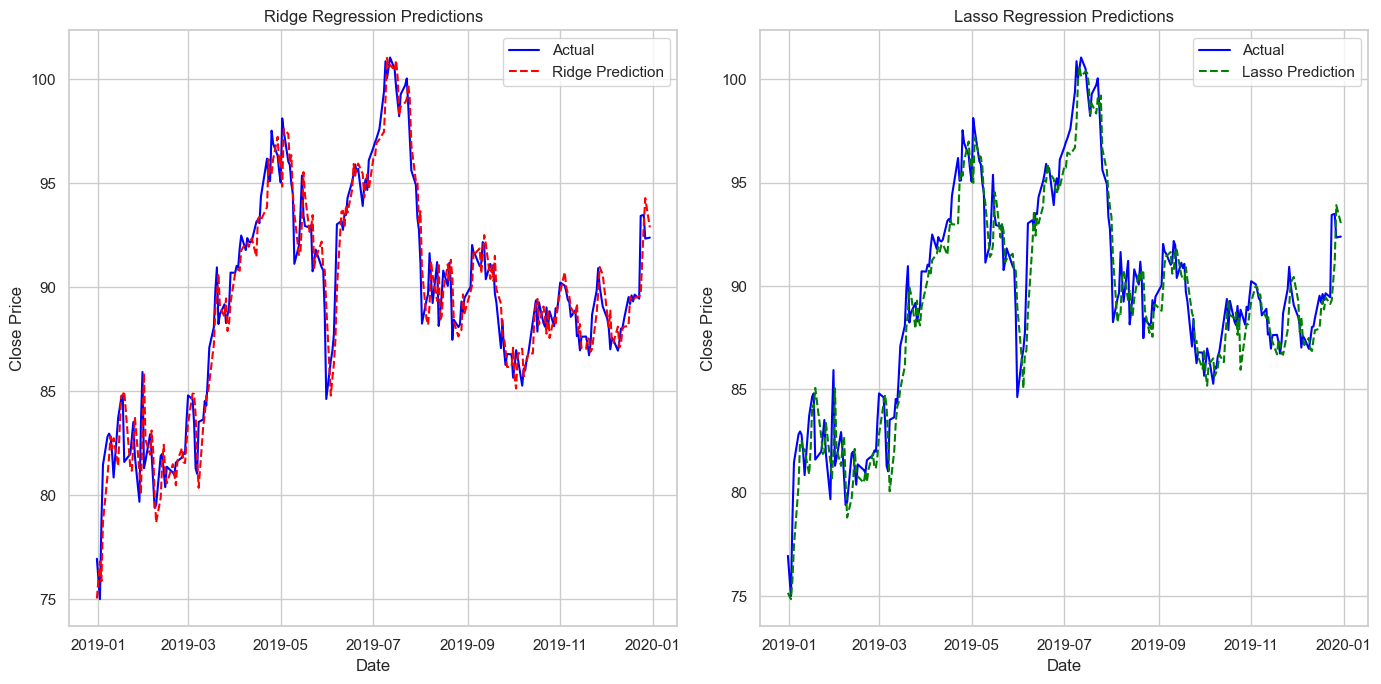

In [167]:
compare_ridge_lasso(ticker='AMZN', start_date=start, end_date=end)

[*********************100%***********************]  1 of 1 completed

Fetching data for NVDA from 2015-01-01 to 2020-01-01...



/usr/local/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.396e-01, tolerance: 3.350e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.853e-01, tolerance: 3.744e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the

Best Alpha for Ridge Regression: 0.01
Best Alpha for Lasso Regression: 0.01

Ridge Regression - MAE: 0.0799, MSE: 0.0111, R²: 0.9716
Lasso Regression - MAE: 0.0863, MSE: 0.0126, R²: 0.9677


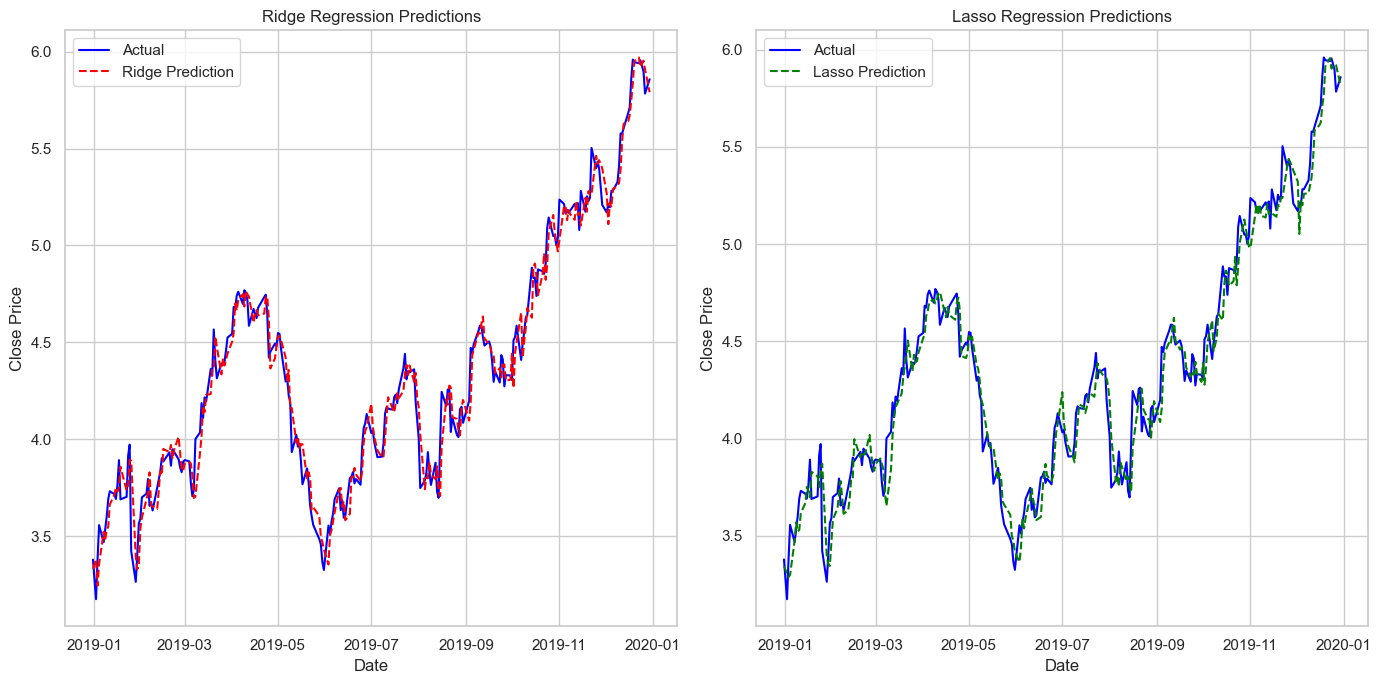

In [168]:
compare_ridge_lasso(ticker='NVDA', start_date=start, end_date=end)

[*********************100%***********************]  1 of 1 completed

Fetching data for AVGO from 2015-01-01 to 2020-01-01...



/usr/local/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.748e+00, tolerance: 1.181e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.161e+00, tolerance: 1.551e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the

Best Alpha for Ridge Regression: 0.01
Best Alpha for Lasso Regression: 0.01

Ridge Regression - MAE: 0.3513, MSE: 0.2182, R²: 0.9369
Lasso Regression - MAE: 0.3658, MSE: 0.2309, R²: 0.9333


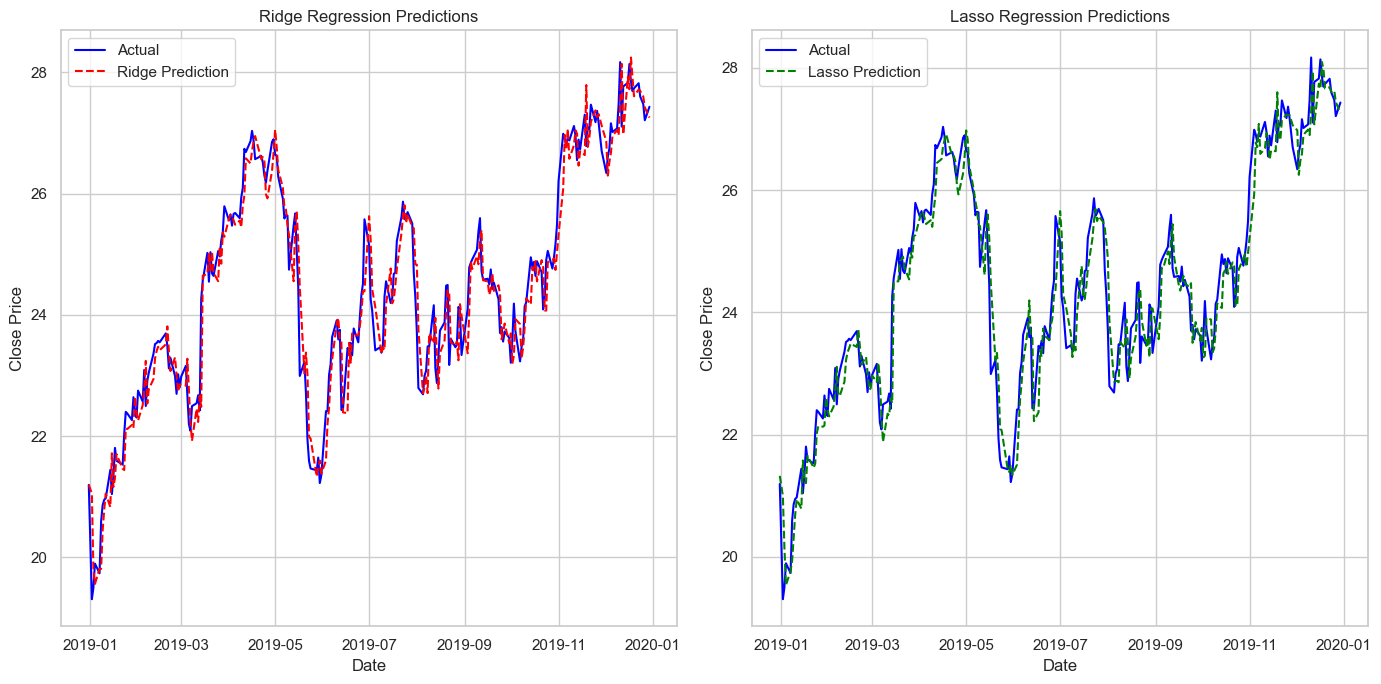

In [169]:
compare_ridge_lasso(ticker='AVGO', start_date=start, end_date=end)


*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed


Best alpha for Ridge Regression: 1e-06
Ridge Regression - MAE: 0.9511
Ridge Regression - MSE: 1.4951
Ridge Regression - R²: 0.9776


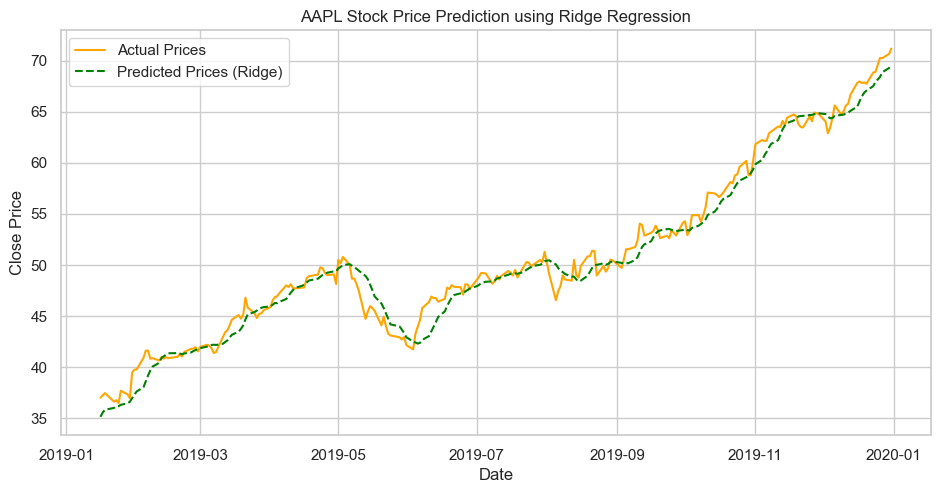

In [143]:
def ridge_stock_prediction(ticker, start_date, end_date):
    """
    Perform stock price prediction using Ridge Regression.
    
    Parameters:
        ticker (str): Stock ticker symbol (e.g., 'AAPL', 'NVDA').
        start_date (str): Start date for stock data in 'YYYY-MM-DD' format.
        end_date (str): End date for stock data in 'YYYY-MM-DD' format.
    """
    # Step 1: Fetch stock data
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # Step 2: Data Preprocessing
    # Use Close prices for prediction
    data = data[['Close']]
    data['Date'] = data.index

    # Feature Engineering (adding moving averages)
    data['10-day MA'] = data['Close'].rolling(window=10).mean()
    data['50-day MA'] = data['Close'].rolling(window=50).mean()
    data.dropna(inplace=True)  # Remove rows with missing values

    # Features (moving averages) and target (Close price)
    X = data[['10-day MA', '50-day MA']]
    y = data['Close']

    # Step 3: Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Step 4: Hyperparameter tuning using GridSearchCV
    param_grid = {'alpha': np.logspace(-6, 6, 13)}
    ridge_regressor = Ridge()
    grid_search = GridSearchCV(ridge_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Best alpha from GridSearch
    best_alpha = grid_search.best_params_['alpha']
    print(f"Best alpha for Ridge Regression: {best_alpha}")

    # Step 5: Train Ridge model with the best alpha
    ridge_model = Ridge(alpha=best_alpha)
    ridge_model.fit(X_train, y_train)

    # Step 6: Predictions
    y_pred = ridge_model.predict(X_test)

    # Step 7: Model Evaluation
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Ridge Regression - MAE: {mae:.4f}")
    print(f"Ridge Regression - MSE: {mse:.4f}")
    print(f"Ridge Regression - R²: {r2:.4f}")
# Step 8: Plot Actual vs Predicted Prices
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.index, y_test, label='Actual Prices', color='orange')
    plt.plot(y_test.index, y_pred, label='Predicted Prices (Ridge)', color='green', linestyle='--')
    plt.title(f'{ticker} Stock Price Prediction using Ridge Regression')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()
    
ridge_stock_prediction( 'AAPL', start, end)

[*********************100%***********************]  1 of 1 completed


Best alpha for Ridge Regression: 100.0
Ridge Regression - MAE: 8.2190
Ridge Regression - MSE: 119.7019
Ridge Regression - R²: 0.8253


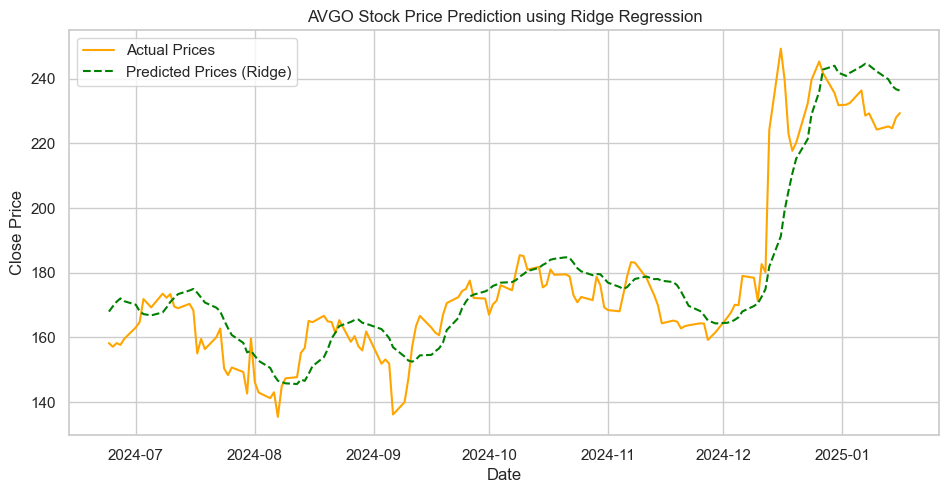

In [185]:
#ridge_stock_prediction( 'AAPL', '2022-01-01', '2025-01-17')
#ridge_stock_prediction( 'AMZN', start, end)
#ridge_stock_prediction( 'AVGO', start, end)
ridge_stock_prediction( 'AVGO','2022-01-01', '2025-01-17')

When comparing the two Ridge Regression models 

Model 1 (Historic Data):
Mean Absolute Error (MAE): 0.9511
Mean Squared Error (MSE): 1.4951
R-squared (R²): 0.9776
This model, based on historic data, performs quite well with a high R² value, 
indicating it explains most of the variance, and the error metrics are 
relatively low, suggesting good predictive accuracy.

Model 2 (Current Date Data):
Mean Absolute Error (MAE): 4.5704
Mean Squared Error (MSE): 28.8346
R-squared (R²): 0.7629
This model, based on current date data, shows weaker performance. The lower R²
value indicates it explains less of the variance in the data, and the higher 
error metrics suggest less accuracy in prediction.
Conclusion: The historic data model (Model 1) outperforms the current 
date model (Model 2) in terms of predictive accuracy, as evidenced by 
its higher R² value and lower error metrics. The current date model seems t
o struggle with making accurate predictions, 
potentially due to recent changes or shifts in the data

Improvments :
This approach provides an estimate based on historical data but does not account for external factors (e.g., market news, company earnings) that can also affect stock prices. For more accurate predictions, you may consider using more advanced machine learning techniques or time series forecasting models like  LSTM, or XGBoost.


In [ ]:
def calculate_stock_correlation(tickers, start_date, end_date):
    """
    Calculate and visualize the correlation matrix of stock returns.

    Parameters:
        tickers (list): List of stock ticker symbols.
        start_date (str): Start date in 'YYYY-MM-DD' format.
        end_date (str): End date in 'YYYY-MM-DD' format.

    Outputs:
        - Correlation matrix heatmap.
        - Correlation values with a specific stock (if specified).
    """
    print(f"Fetching data for tickers: {', '.join(tickers)} from {start_date} to {end_date}...")
    
    # Download stock data
    stocks_data = yf.download(tickers, start=start_date, end=end_date)['Close']
    
    # Calculate daily returns
    daily_returns = stocks_data.pct_change().dropna()
    
    # Calculate the correlation matrix
    correlation_matrix = daily_returns.corr()
    
    # Display the correlation matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of Stock Returns')
    plt.show()
    
    return correlation_matrix
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA','NVDA','AVGO']
correlation_matrix = calculate_stock_correlation(tickers, start, end_dat)


[*********************100%***********************]  1 of 1 completed


Best alpha for Ridge Regression: 1e-06
Ridge Regression - MAE: 5.2090
Ridge Regression - MSE: 39.9486
Ridge Regression - R²: 0.8770


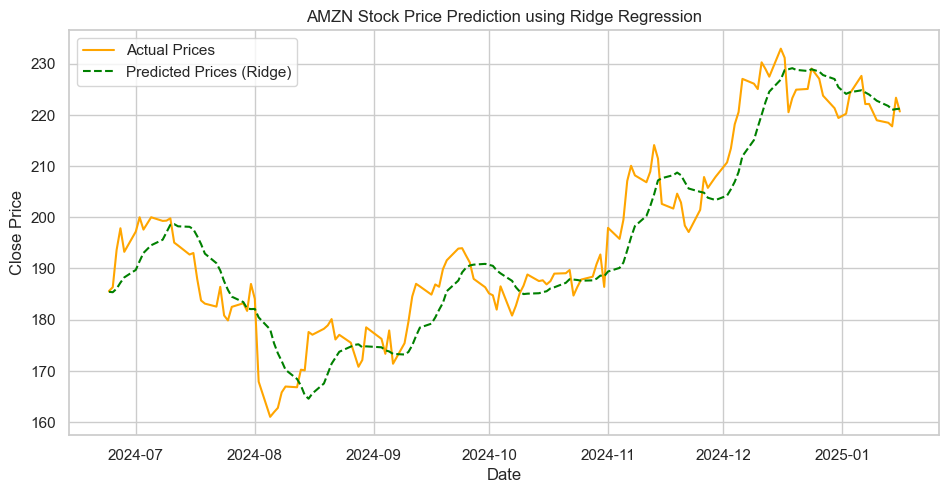

In [173]:
ridge_stock_prediction( 'AMZN', '2022-01-01', '2025-01-17')

[*********************100%***********************]  1 of 1 completed


Best alpha for Ridge Regression: 100.0
Ridge Regression - MAE: 8.2190
Ridge Regression - MSE: 119.7019
Ridge Regression - R²: 0.8253


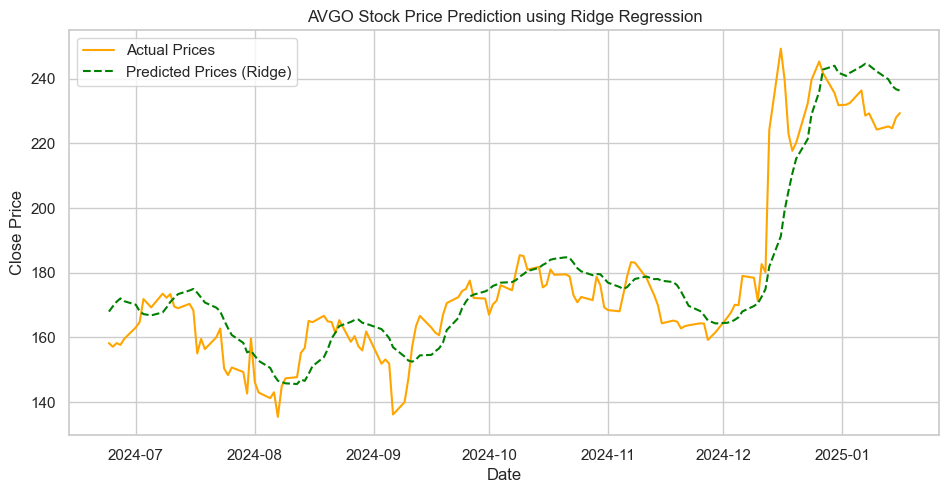

In [174]:
ridge_stock_prediction( 'AVGO', '2022-01-01', '2025-01-17')

[*********************100%***********************]  1 of 1 completed


Best alpha for Ridge Regression: 1e-06
Ridge Regression - MAE: 5.5926
Ridge Regression - MSE: 48.7433
Ridge Regression - R²: 0.6762


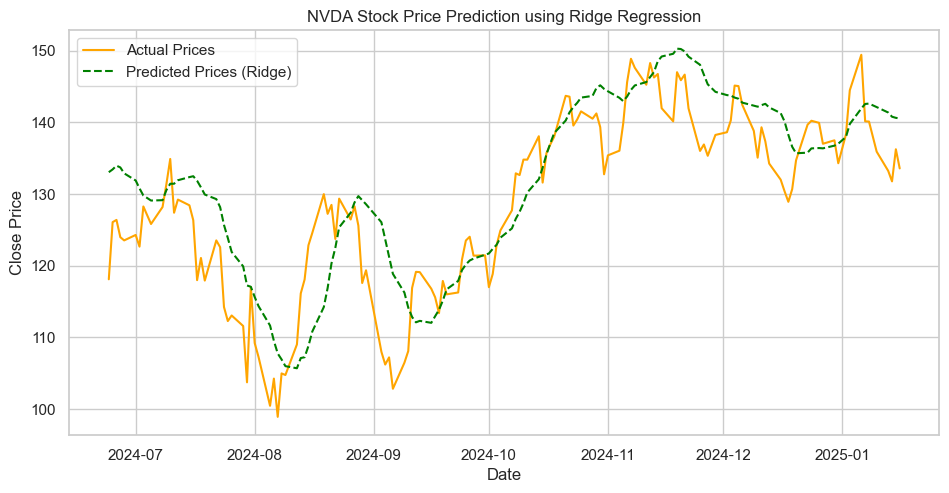

In [175]:
ridge_stock_prediction( 'NVDA', '2022-01-01', '2025-01-17')


Improvments :
This approach provides an estimate based on historical data but does not account for external factors (e.g., market news, company earnings) that can also affect stock prices. For more accurate predictions, you may consider using more advanced machine learning techniques or time series forecasting models like  LSTM, or XGBoost.

[*********************100%***********************]  1 of 1 completed
/usr/local/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Mean Squared Error: 10.756976324328049
Correlation Matrix:
          AAPL      NVDA      AVGO      TSLA      AMZN
AAPL  1.000000  0.429845  0.532794  0.298003  0.492521
NVDA  0.429845  1.000000  0.454450  0.278223  0.397014
AVGO  0.532794  0.454450  1.000000  0.300510  0.350086
TSLA  0.298003  0.278223  0.300510  1.000000  0.311321
AMZN  0.492521  0.397014  0.350086  0.311321  1.000000


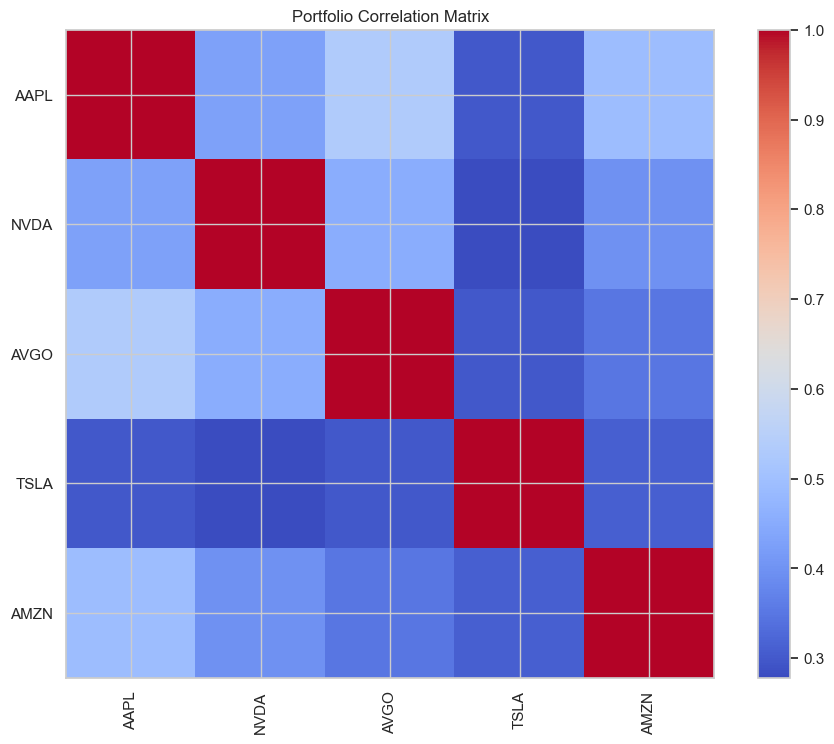

In [181]:

# Step 1: Fetch historical stock data
def fetch_stock_data(ticker, start, end):
    stock_data = yf.download(ticker, start=start, end=end)
    stock_data['Ticker'] = ticker
    return stock_data

# Step 2: Add technical indicators
def add_features(data):
    data['SMA_10'] = data['Close'].rolling(window=10).mean()  # Simple Moving Average (10 days)
    data['SMA_50'] = data['Close'].rolling(window=50).mean()  # Simple Moving Average (50 days)
    data['Daily_Return'] = data['Close'].pct_change()         # Daily Returns
    data = data.dropna()  # Drop rows with NaN values
    return data

# Step 3: Train a model to predict stock prices
def train_prediction_model(data):
    # Features: [SMA_10, SMA_50, Daily_Return]
    X = data[['SMA_10', 'SMA_50', 'Daily_Return']]
    y = data['Close']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    print(f"Mean Squared Error: {mse}")
    
    return model, X_test, predictions

# Step 4: Portfolio diversification
def suggest_diversification(tickers, start, end):
    portfolio_data = pd.DataFrame()
    for ticker in tickers:
        stock = fetch_stock_data(ticker, start, end)
        stock['Daily_Return'] = stock['Close'].pct_change()
        portfolio_data[ticker] = stock['Daily_Return']
    
    # Calculate correlation matrix
    correlation_matrix = portfolio_data.corr()
    print("Correlation Matrix:")
    print(correlation_matrix)
    
    # Visualize correlation matrix
    plt.figure(figsize=(10, 8))
    plt.title("Portfolio Correlation Matrix")
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.xticks(range(len(tickers)), tickers, rotation=90)
    plt.yticks(range(len(tickers)), tickers)
    plt.show()

   
# Main Function
if __name__ == "__main__":
    # Define parameters
    ticker = 'AAPL'  # Example: Apple stock
    tickers = ['AAPL', 'NVDA', 'AVGO', 'TSLA', 'AMZN']  # Portfolio for diversification
    
    # Fetch and process data
    stock_data = fetch_stock_data(ticker, start_date, end_date)
    stock_data = add_features(stock_data)
    
    # Train model
    model, X_test, predictions = train_prediction_model(stock_data)
    
    # Suggest diversification
    suggest_diversification(tickers, start, end)




     


Code Optimzer for linear Regression 

Conclusion:

The correlation matrix reveals the following insights about the relationships between the selected stocks:

AAPL shows moderate positive correlations with AVGO (0.5328) and AMZN (0.4925), indicating that Apple’s stock tends to move somewhat in sync with these companies.
NVDA has a relatively strong positive correlation with AAPL (0.4298), and weaker correlations with AVGO (0.4545) and AMZN (0.3970), suggesting some degree of parallel movement in their stock prices.
AVGO has notable correlations with both AAPL (0.5328) and NVDA (0.4545), which shows that these stocks share similar market behavior to a certain extent.
TSLA has relatively weak correlations with the other stocks, particularly with AAPL (0.2980) and AMZN (0.3113), suggesting it behaves more independently in comparison.
AMZN has moderate correlations with AAPL (0.4925), NVDA (0.3970), and AVGO (0.3501), indicating some commonality in price movements, but less so than AAPL or AVGO.
Overall, there are moderate correlations among the stocks, with Apple (AAPL) and Nvidia (NVDA) showing stronger links to other companies, particularly AVGO and AMZN. Tesla (TSLA) appears to behave more independently compared to the other stocks. These insights may inform decisions on portfolio diversification or risk management strategies based on stock behavior.